In [2]:
## data ingestions
import pandas as pd
df=pd.read_csv('data/gemstone.csv',index_col=False)
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
df.drop(labels=['id'],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.duplicated().sum()

0

In [7]:
## separating into numerical and categorical feature

numerical_col=df.columns[df.dtypes!='object']
categorical_col = df.columns[df.dtypes=='object']
print("numerical columns",numerical_col)
print("Categorical columns:",categorical_col)


numerical columns Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [8]:
df[categorical_col].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [9]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [10]:
df['color'].value_counts

<bound method IndexOpsMixin.value_counts of 0         F
1         J
2         G
3         G
4         G
         ..
193568    D
193569    G
193570    F
193571    D
193572    E
Name: color, Length: 193573, dtype: object>

In [11]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

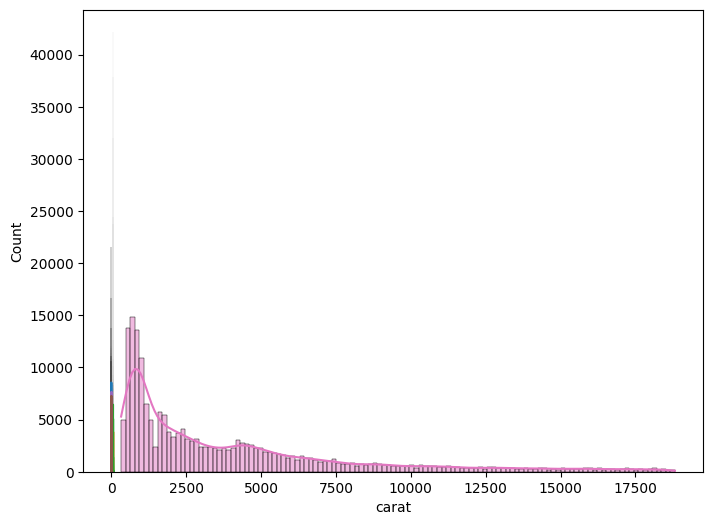

In [12]:
### for numerical feature: histplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_col:
    sns.histplot(data=df,x=i,kde=True)       # it tells how many data points are falling in a particular columns
    print('\n')
    plt.show

<Figure size 1000x1000 with 0 Axes>

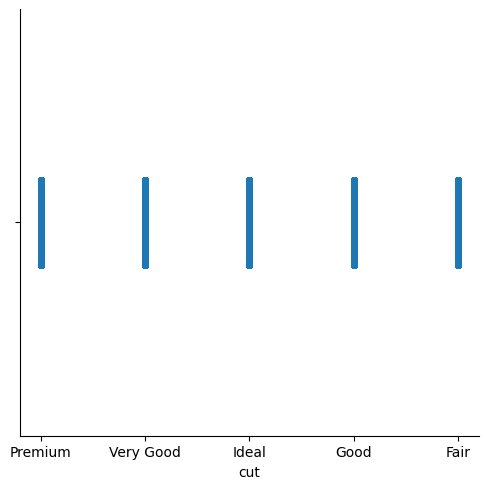

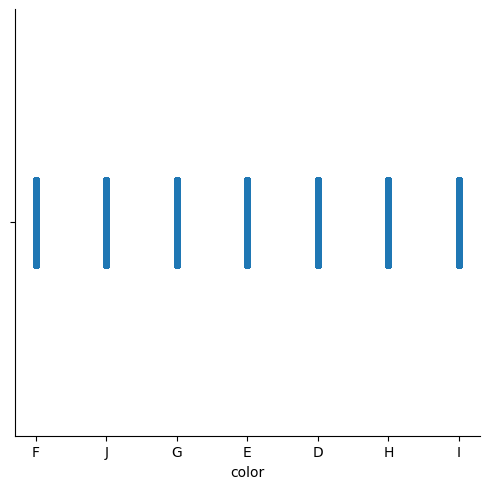

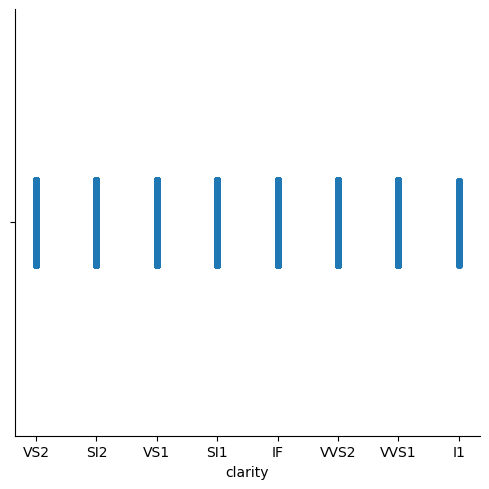

In [13]:
## for categorical feature : catplot

plt.figure(figsize=(10,10))
for i in categorical_col:
    sns.catplot(data=df,x=i,kind='strip',estimator="mean")
    print('\n')
    plt.show()


<Axes: >

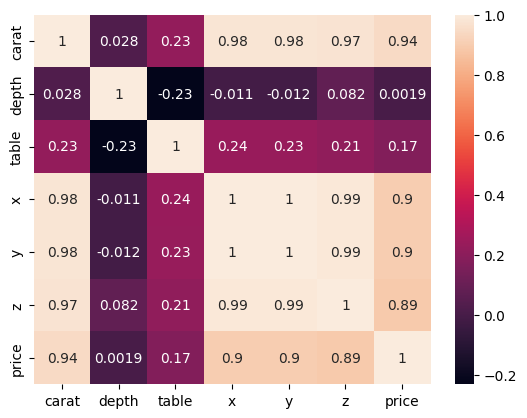

In [14]:
## correlation
sns.heatmap(df[numerical_col].corr(),annot=True)

In [15]:
## time to convert categorical feature into numerical feature

df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [16]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [17]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [18]:
clarity_map ={"I1":1,"SI2":2,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [19]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [20]:
color_map ={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [21]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4.0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2.0,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5.0,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5.0,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4.0,62.6,59.0,7.65,7.61,4.77,14453


In [23]:
df.isnull().sum()

carat          0
cut            0
color          0
clarity    53272
depth          0
table          0
x              0
y              0
z              0
price          0
dtype: int64